In [181]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [182]:
def get_time(filename):
    values = filename.split("_")
    for t_value in values:
        if t_value in ['2','4','6','8','10','12']:
            # print(t_value)
            return int(t_value)
    return None

In [183]:
features_col = ['Arflux1','Arflux2','Arflux3','Arflux4','Arflux5','Arflux6',
            'Fflux1','Fflux2','Fflux3','Fflux4','Fflux5','Fflux6',
            'ArExponent','FrExponent',
            'yield_at_zero1','yield_at_zero2','yield_at_zero3',
            'yield_max1','yield_max2','yield_max3',
            'theta_max1','theta_max2','theta_max3','mizk',
            'p1','p2','p3','p4','p5']

In [184]:
df_final = pd.DataFrame()

test_df_final = pd.DataFrame()

file_num = 0

for folder in os.listdir('C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles'):
    file_num+=6
    
    input_values = folder.split('_')[1:]
    input_values = [float(item) for item in input_values]

    # sorting file acc to len so that t= 10,12 gets to its original pos
    for file in sorted(os.listdir(f'C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles/{folder}'), key=len):

        if(file_num<2406):
            df = pd.read_csv(f'C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles/{folder}/{file}')

        #dropping rows with zero valies in it
            zero_values_row_index = df[df['FitRadius_Avg']==0].index
            df = df.drop(zero_values_row_index)

        #just for getting depth
            new_col_names = ['Z','avg fitradius', 'time']
            new_row_values =  [-df['Z'].iloc[0], df['FitRadius_Avg'].mean(), get_time(file)]
            new_df = pd.DataFrame([new_row_values],columns=new_col_names)

            for i in range(29):
                # print(features_col[i], input_values[i])
                new_df[features_col[i]] = input_values[i]
            df_final = pd.concat([df_final,new_df])    

        else:

            test_df = pd.read_csv(f'C:/Users/jayra/OneDrive/Documents/IITGN/Sentaurus/Data/csvfiles/{folder}/{file}')

        #dropping rows with zero valies in it
            zero_values_row_index = test_df[test_df['FitRadius_Avg']==0].index
            test_df = test_df.drop(zero_values_row_index)

        #just for getting depth
            new_col_names = ['Z','avg fitradius', 'time']
            new_row_values =  [-test_df['Z'].iloc[0], test_df['FitRadius_Avg'].mean(), get_time(file)]
            new_df = pd.DataFrame([new_row_values],columns=new_col_names)

            for i in range(29):
                # print(features_col[i], input_values[i])
                new_df[features_col[i]] = input_values[i]
            test_df_final = pd.concat([test_df_final,new_df])    

In [185]:
test_df_final.shape

(600, 32)

In [186]:
test_df_final

,Z,avg fitradius,time,Arflux1,Arflux2,Arflux3,Arflux4,Arflux5,Arflux6,Fflux1,...,yield_max3,theta_max1,theta_max2,theta_max3,mizk,p1,p2,p3,p4,p5
0,0.0185,0.024953,2,0.0067,0.0046,0.0042,0.0078,0.0026,0.0028,0.0021,...,4.7733,42.4311,82.877,50.7755,0.0244,0.0012,0.9070,0.0005,0.5464,0.0000
0,0.0335,0.025552,4,0.0067,0.0046,0.0042,0.0078,0.0026,0.0028,0.0021,...,4.7733,42.4311,82.877,50.7755,0.0244,0.0012,0.9070,0.0005,0.5464,0.0000
0,0.0555,0.026633,6,0.0067,0.0046,0.0042,0.0078,0.0026,0.0028,0.0021,...,4.7733,42.4311,82.877,50.7755,0.0244,0.0012,0.9070,0.0005,0.5464,0.0000
0,0.0665,0.027648,8,0.0067,0.0046,0.0042,0.0078,0.0026,0.0028,0.0021,...,4.7733,42.4311,82.877,50.7755,0.0244,0.0012,0.9070,0.0005,0.5464,0.0000
0,0.0785,0.028587,10,0.0067,0.0046,0.0042,0.0078,0.0026,0.0028,0.0021,...,4.7733,42.4311,82.877,50.7755,0.0244,0.0012,0.9070,0.0005,0.5464,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0795,0.026496,4,0.0080,0.0062,0.0011,0.0025,0.0077,0.0038,0.0037,...,8.4017,77.4823,48.430,80.9735,0.0238,0.0004,0.8491,0.0014,0.5947,0.0002
0,0.1195,0.027919,6,0.0080,0.0062,0.0011,0.0025,0.0077,0.0038,0.0037,...,8.4017,77.4823,48.430,80.9735,0.0238,0.0004,0.8491,0.0014,0.5947,0.0002
0,0.1545,0.028251,8,0.0080,0.0062,0.0011,0.0025,0.0077,0.0038,0.0037,...,8.4017,77.4823,48.430,80.9735,0.0238,0.0004,0.8491,0.0014,0.5947,0.0002
0,0.1965,0.028450,10,0.0080,0.0062,0.0011,0.0025,0.0077,0.0038,0.0037,...,8.4017,77.4823,48.430,80.9735,0.0238,0.0004,0.8491,0.0014,0.5947,0.0002


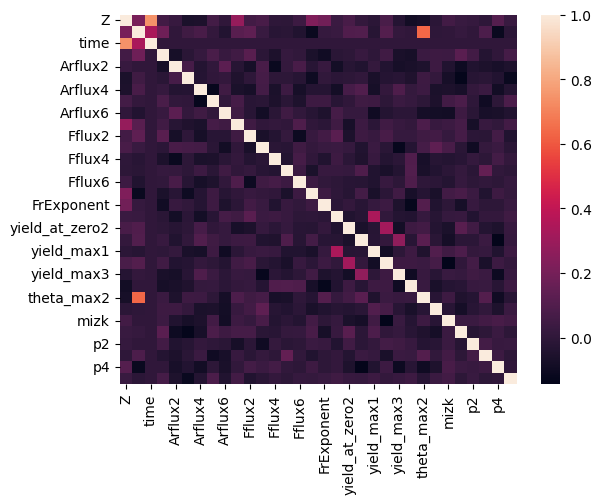

In [187]:
corr = df_final.corr()
heatmap_corr = sns.heatmap(corr)

In [188]:
x_train = df_final.loc[:, ~df_final.columns.isin(['Z','avg fitradius'])]
y_train = df_final[['Z', 'avg fitradius']]
y_test = test_df_final[['Z', 'avg fitradius']]
x_test = test_df_final.drop(['Z','avg fitradius'], axis=1)

In [189]:
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler_x_train = StandardScaler()
X_scale_arr = scaler_x_train.fit_transform(x_train)
df_scaledX = pd.DataFrame(X_scale_arr, columns=x_train.columns)

scaler_y_train = StandardScaler()
y_scale_arr = scaler_y_train.fit_transform(y_train)
df_scaledy = pd.DataFrame(y_scale_arr, columns=y_train.columns)

scaler_x_test = StandardScaler()
X_scale_t_arr = scaler_x_test.fit_transform(x_test)
df_scaledX_t = pd.DataFrame(X_scale_t_arr, columns=x_test.columns)

scaler_y_test = StandardScaler()
y_scale_t_arr = scaler_y_test.fit_transform(y_test)
df_scaledy_t = pd.DataFrame(y_scale_t_arr, columns=y_test.columns)


X_train_scaled_reshaped = X_scale_arr.reshape(X_scale_arr.shape[0],1,X_scale_arr.shape[1])
X_train_scaled_reshaped.shape

X_test_scaled_reshaped = X_scale_t_arr.reshape(X_scale_t_arr.shape[0],1,X_scale_t_arr.shape[1])
X_test_scaled_reshaped.shape

(600, 1, 30)

In [ ]:
X_df = pd.concat([df_scaledX,df_scaledX_t])
y_df = pd.concat([df_scaledy,df_scaledy_t])

Random Forest Regressor (Ensemble method)

Using K-fold cross validation

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_validate

#if using k fold validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = RandomForestRegressor(n_estimators=200, random_state=42)

##Cross-validation (automatic)

cv_results = cross_validate(
    model,X_df , y_df, cv=kf, scoring={'mse': mse_scorer, 'r2': r2_scorer}, return_train_score=True
)
print("Cross-Validation MSE:", -cv_results['test_mse'].mean())
print("Cross-Validation R^2:", cv_results['test_r2'].mean())
print("\nDetailed Cross-Validation Results:")
print(pd.DataFrame(cv_results))

Without k-fold

In [226]:
# Without K-fold Cross validation

from sklearn.ensemble import RandomForestRegressor

#after certain value, no of trees doesn't matter
model = RandomForestRegressor(n_estimators=150, random_state=42)

model.fit(X_train_scaled_reshaped.reshape(X_train_scaled_reshaped.shape[0], X_train_scaled_reshaped.shape[2]), y_scale_arr)
y_pred = model.predict(X_test_scaled_reshaped.reshape(X_test_scaled_reshaped.shape[0], X_test_scaled_reshaped.shape[2]))

# Evaluate the model
mse = mean_squared_error(y_scale_t_arr, y_pred, multioutput='raw_values').mean()
r2 = r2_score(y_scale_t_arr, y_pred, multioutput='raw_values').mean()

print("Mean Squared Error for each target:", mse)
print("Variance Weighted R^2 Score:", r2)

# Detailed R^2 Score for each target
# r2_individual = r2_score(y_train, y_pred, multioutput='raw_values')
# print("R^2 Score for each target:", r2_individual)

TypeError: 'numpy.float64' object is not callable

In [129]:
predictions = scaler_y_test.inverse_transform(y_pred)
x_test_plot = scaler_x_test.inverse_transform(X_test_scaled_reshaped.reshape(X_test_scaled_reshaped.shape[0],X_test_scaled_reshaped.shape[2]))

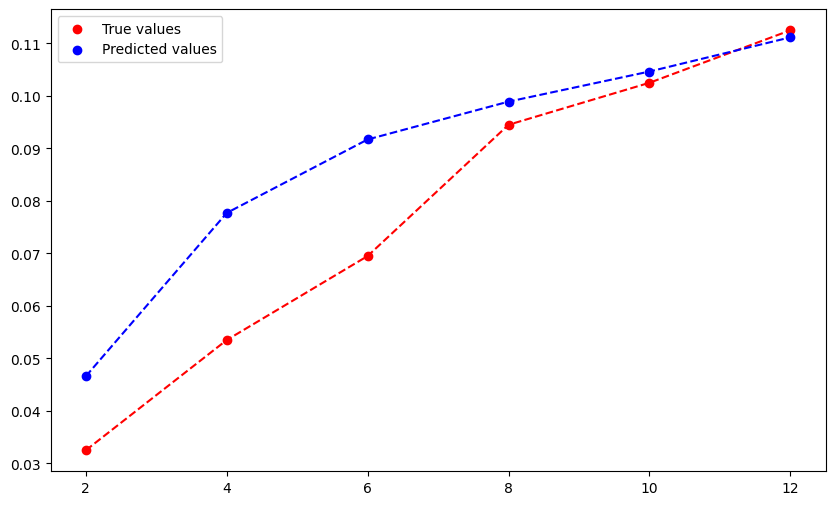

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(x_test.iloc[6:12,0],y_test.iloc[6:12,0],c='red',label=f'True values')
plt.plot(x_test.iloc[6:12,0],y_test.iloc[6:12,0], 'r--')
plt.scatter(x_test_plot[6:12,0],predictions[6:12,0],linestyle='-',c='blue',label=f'Predicted values')
plt.plot(x_test_plot[6:12,0],predictions[6:12,0], 'b--')

plt.legend()
plt.show()


LSTM model

In [284]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(100, input_shape=input_shape, return_sequences=True, activation='relu'))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(30, return_sequences=True))
    model.add(LSTM(10))
    model.add(Dense(2))  # Assuming 2 target variables
    model.compile(optimizer='adam', loss='mae')
    return model

In [285]:
# Build and train the model
model = create_lstm_model(input_shape=(X_train_scaled_reshaped.shape[1], X_train_scaled_reshaped.shape[2]))
model.fit(X_train_scaled_reshaped, y_scale_arr, epochs=50, batch_size=1, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test_scaled_reshaped)

Epoch 1/50
1872/2400 [======================>.......] - ETA: 1s - loss: 0.4078

KeyboardInterrupt: 

In [268]:
from sklearn.metrics import make_scorer, mean_squared_error,mean_absolute_error, r2_score

def custom_mse(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred, multioutput='raw_values').mean()

def custom_r2(y_true, y_pred):
    return r2_score(y_true, y_pred, multioutput='variance_weighted').mean()

mse_scorer = make_scorer(custom_mse, greater_is_better=False)
r2_scorer = make_scorer(custom_r2)

In [269]:
# Evaluate the model
mae = custom_mse(y_scale_t_arr, y_pred)
r2_score = custom_r2(y_scale_t_arr, y_pred)

print("Mean Abs Error (MAE):", mae)
print("R2 score: ", r2_score)

Mean Abs Error (MAE): 0.34784847843315814
R2 score:  0.7703555615745444


In [277]:
predictions = scaler_y_train.inverse_transform(y_pred)
x_test_plot = scaler_x_test.inverse_transform(X_test_scaled_reshaped.reshape(X_test_scaled_reshaped.shape[0],30))

plot of CD(fit radius) vs Z for true and predicted

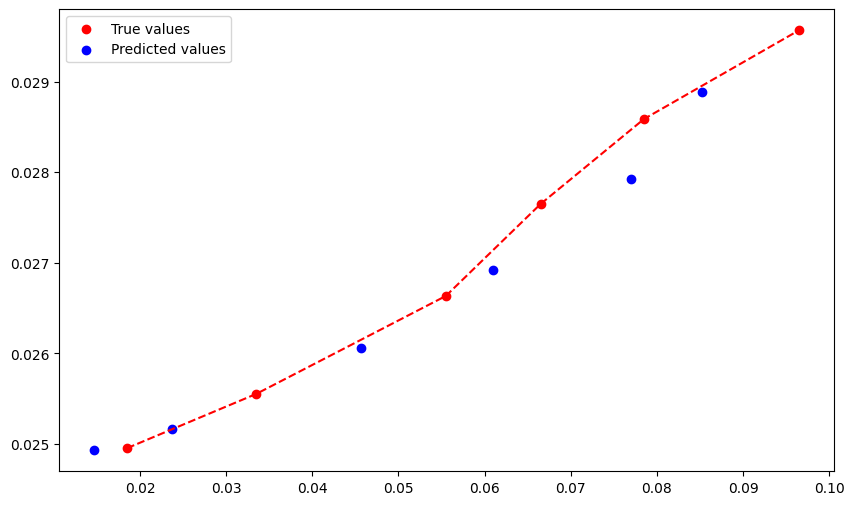

In [281]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,6))

# plt.scatter(y_test.iloc[:6,0],y_test.iloc[:6,1],c='red',label=f'True values')
# plt.plot(y_test.iloc[:6,0],y_test.iloc[:6,1],'r--')
# plt.scatter(predictions[:6,0],predictions[:6,1],linestyle='-',c='blue',label=f'Predicted values')
# # plt.plot(x_test_plot[:6,0],predictions[:6,0],'b--')

# plt.legend()
# plt.show()


plot of true value and predicted value

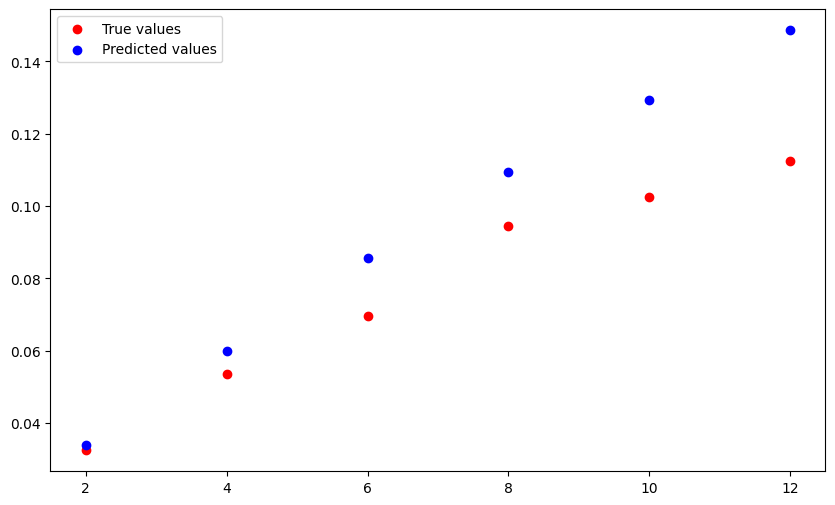

In [286]:
plt.figure(figsize=(10,6))

plt.scatter(x_test.iloc[6:12,0],y_test.iloc[6:12,0],c='red',label=f'True values')
plt.scatter(x_test_plot[6:12,0],predictions[6:12,0],linestyle='-',c='blue',label=f'Predicted values')
plt.legend()
plt.show()


In [215]:
test_df_final.head(12)

,Z,avg fitradius,time,Arflux1,Arflux2,Arflux3,Arflux4,Arflux5,Arflux6,Fflux1,...,yield_max3,theta_max1,theta_max2,theta_max3,mizk,p1,p2,p3,p4,p5
0,0.0185,0.024953,2,0.0067,0.0046,0.0042,0.0078,0.0026,0.0028,0.0021,...,4.7733,42.4311,82.8770,50.7755,0.0244,0.0012,0.9070,0.0005,0.5464,0.0000
0,0.0335,0.025552,4,0.0067,0.0046,0.0042,0.0078,0.0026,0.0028,0.0021,...,4.7733,42.4311,82.8770,50.7755,0.0244,0.0012,0.9070,0.0005,0.5464,0.0000
0,0.0555,0.026633,6,0.0067,0.0046,0.0042,0.0078,0.0026,0.0028,0.0021,...,4.7733,42.4311,82.8770,50.7755,0.0244,0.0012,0.9070,0.0005,0.5464,0.0000
0,0.0665,0.027648,8,0.0067,0.0046,0.0042,0.0078,0.0026,0.0028,0.0021,...,4.7733,42.4311,82.8770,50.7755,0.0244,0.0012,0.9070,0.0005,0.5464,0.0000
0,0.0785,0.028587,10,0.0067,0.0046,0.0042,0.0078,0.0026,0.0028,0.0021,...,4.7733,42.4311,82.8770,50.7755,0.0244,0.0012,0.9070,0.0005,0.5464,0.0000
0,0.0965,0.029567,12,0.0067,0.0046,0.0042,0.0078,0.0026,0.0028,0.0021,...,4.7733,42.4311,82.8770,50.7755,0.0244,0.0012,0.9070,0.0005,0.5464,0.0000
0,0.0325,0.025279,2,0.0067,0.0057,0.0032,0.0078,0.0066,0.0034,0.0043,...,7.6569,61.2482,82.9282,85.8021,0.0456,0.0000,0.9635,0.0008,0.7620,0.0002
0,0.0535,0.026619,4,0.0067,0.0057,0.0032,0.0078,0.0066,0.0034,0.0043,...,7.6569,61.2482,82.9282,85.8021,0.0456,0.0000,0.9635,0.0008,0.7620,0.0002
0,0.0695,0.028026,6,0.0067,0.0057,0.0032,0.0078,0.0066,0.0034,0.0043,...,7.6569,61.2482,82.9282,85.8021,0.0456,0.0000,0.9635,0.0008,0.7620,0.0002
0,0.0945,0.029600,8,0.0067,0.0057,0.0032,0.0078,0.0066,0.0034,0.0043,...,7.6569,61.2482,82.9282,85.8021,0.0456,0.0000,0.9635,0.0008,0.7620,0.0002


In [216]:
predictions_df = pd.DataFrame(predictions, columns=['Z','avg fitradius'])
predictions_df.head(12)

,Z,avg fitradius
0,0.009256,0.024837
1,0.018865,0.025126
2,0.054105,0.026522
3,0.066642,0.027342
4,0.076188,0.027844
5,0.087901,0.028648
6,0.036341,0.025177
7,0.058200,0.025995
8,0.092249,0.027495
9,0.116036,0.029393


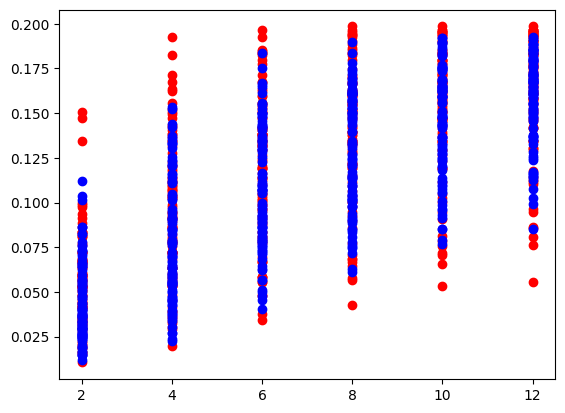

In [287]:
plt.scatter(x_test.iloc[:,0],y_test.iloc[:,0],c='red',label=f'True values')
plt.scatter(x_test_plot[:,0],predictions[:,0],linestyle='-',c='blue',label=f'Predicted values')

SARIMA model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# model = SARIMAX(d, order=(p, d, q), seasonal_order=(P, D, Q, s))
# model_fit = model.fit(disp=0)
# prediction = model_fit.forecast(steps=n)

GMM

In [172]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6, max_iter=50)
x_train_clusters = gmm.fit_predict(x_train)

gmm_test = GaussianMixture(n_components=6, max_iter=50)
x_test_clusters = gmm.fit_predict(x_test)

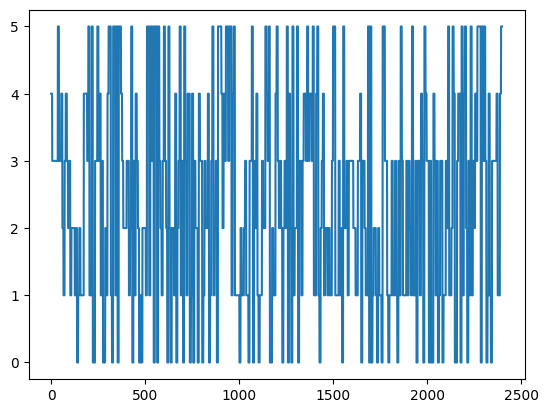

In [180]:
plt.plot(x_train_clusters)

In [ ]:
X_cluster_df = pd.DataFrame(np.concatenate())

GNNs

In [291]:
import numpy as np
import tensorflow as tf
import tensorflow_gnn as tfgnn
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Assuming X_train_scaled_reshaped and y_scale_arr are available and formatted as required

# Sample data preparation
num_nodes = X_train_scaled_reshaped.shape[1]
num_features = X_train_scaled_reshaped.shape[2]
num_classes = y_scale_arr.shape[1]

# Generate random adjacency matrix (fully connected for simplicity)
A = np.ones((num_nodes, num_nodes)) - np.eye(num_nodes)

# Define GraphTensor structure
def create_graph_tensor(X, A):
    num_nodes = X.shape[0]
    node_features = tf.constant(X, dtype=tf.float32)
    edge_indices = np.column_stack(np.where(A))
    edge_indices = edge_indices[edge_indices[:, 0] != edge_indices[:, 1]]  # Remove self-loops
    
    graph = tfgnn.GraphTensor.from_pieces(
        node_sets={
            'nodes': tfgnn.NodeSet.from_fields(
                sizes=[num_nodes],
                features={'features': node_features}
            )
        },
        edge_sets={
            'edges': tfgnn.EdgeSet.from_fields(
                sizes=[len(edge_indices)],  # Number of edges
                adjacency=tfgnn.Adjacency.from_indices(
                    source=('nodes', edge_indices[:, 0]),
                    target=('nodes', edge_indices[:, 1])
                )
            )
        }
    )
    return graph

# Define the GNN model
def create_gnn_model(graph_spec, output_shape):
    inputs = Input(type_spec=graph_spec)

    # Graph Convolutional Layer
    x = tfgnn.keras.layers.GraphUpdate(
        node_sets={'nodes': tfgnn.keras.layers.NodeSetUpdate(
            {'hidden_state': tfgnn.keras.layers.SimpleConv(
                units=32,
                activation='relu'
            )}
        )}
    )(inputs)

    # Pooling layer
    x = tfgnn.keras.layers.Pool(
        'nodes', tfgnn.keras.layers.GlobalAvgPool()
    )(x)

    # Fully connected layers
    x = Dense(64, activation='relu')(x)
    outputs = Dense(output_shape)(x)

    return Model(inputs, outputs)

# Convert GraphTensor to TensorFlow Dataset
def graph_to_dataset(graph, y):
    graph_spec = graph.spec
    data = tf.data.Dataset.from_tensors((graph, tf.constant(y, dtype=tf.float32)))
    return data

# Create GraphTensor for training and testing
graph_train = create_graph_tensor(X_train_scaled_reshaped, A)
graph_test = create_graph_tensor(X_test_scaled_reshaped, A)

# Create datasets
train_dataset = graph_to_dataset(graph_train, y_scale_arr)
test_dataset = graph_to_dataset(graph_test, y_test)

# Create and compile the model
graph_spec = graph_train.spec
output_shape = y_scale_arr.shape[1]
model = create_gnn_model(graph_spec, output_shape)
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_dataset, epochs=50)

# Evaluate the model
loss = model.evaluate(test_dataset)
print(f"Test Loss: {loss}")

# Predict on the test set
y_pred = model.predict(test_dataset)
print("Predictions:", y_pred)


TypeError: SimpleConv.__init__() missing 1 required positional argument: 'message_fn'